# Credit Card Fraud Detection - Exploratory Data Analysis

## Dataset Information
- Source: Kaggle Credit Card Fraud Detection Dataset
- Size: 284,807 transactions (492 fraudulent)
- Features: Time, V1-V28(PCA Transformed), Amount, Class

In [30]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json

print("Libraries imported successfully!")

Libraries imported successfully!


In [31]:
# Set configurations

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Configurations set successfully!")

Configurations set successfully!


In [32]:
# Load the dataset

dataset = pd.read_csv("../data/creditcard.csv")

print(f"Dataset loaded, has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

Dataset loaded, has 284807 rows and 31 columns


In [33]:
# Basic dataset information

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {dataset.shape}")
memory_usage = round((dataset.memory_usage().sum()/(1024**2)), 2)
print(f"Memory Usage: {memory_usage} MB")

print("\n=== COLUMN INFORMATION ===")
dataset.info()

=== DATASET OVERVIEW ===
Dataset shape: (284807, 31)
Memory Usage: 67.36 MB

=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-n

In [34]:
# Look through few rows of dataset

print("=== FIRST 5 ROWS OF DATASET ===")
print(dataset.head())

print("\n=== LAST 5 ROWS OF DATASET ===")
print(dataset.tail())

=== FIRST 5 ROWS OF DATASET ===
   Time    V1    V2    V3    V4    V5    V6    V7    V8    V9   V10   V11   V12   V13   V14   V15   V16   V17   V18   V19   V20   V21   V22   V23   V24   V25   V26   V27   V28  Amount  Class
0   0.0 -1.36 -0.07  2.54  1.38 -0.34  0.46  0.24  0.10  0.36  0.09 -0.55 -0.62 -0.99 -0.31  1.47 -0.47  0.21  0.03  0.40  0.25 -0.02  0.28 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0
1   0.0  1.19  0.27  0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26 -0.17  1.61  1.07  0.49 -0.14  0.64  0.46 -0.11 -0.18 -0.15 -0.07 -0.23 -0.64  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0
2   1.0 -1.36 -1.34  1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  0.21  0.62  0.07  0.72 -0.17  2.35 -2.89  1.11 -0.12 -2.26  0.52  0.25  0.77  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0
3   1.0 -0.97 -0.19  1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39 -0.05 -0.23  0.18  0.51 -0.29 -0.63 -1.06 -0.68  1.97 -1.23 -0.21 -0.11  0.01 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0
4   2.0 -1.16

The dataset has columns: Time, V1–V28, Amount, and Class.<br><br>
Key details:
1. Transactions from European cardholders in Sept 2013 (2 days).
2. Features V1–V28 are PCA components; only Time, Amount, and Class are original.
3. Time: seconds since first transaction.
4. Amount: transaction value.
5. Class: 1 = Fraud, 0 = Not Fraud

In [35]:
# Missing values check

print("\n=== MISSING VALUES CHECK ===")

missing_values_total = dataset.isnull().sum()
missing_val_cols = missing_values_total[missing_values_total > 0]

if missing_val_cols.empty:
    print("\nNo missing values found.")
else:
    print("\nMissing values found in the following columns:")
    print(missing_val_cols)


=== MISSING VALUES CHECK ===

No missing values found.


In [36]:
# Datatypes check
print("\n=== DATATYPES AND UNIQUE VALUES ===")

data_info = pd.DataFrame({
    'Data Type': dataset.dtypes,
    'Unique Values': dataset.nunique()
})
display(data_info)


=== DATATYPES AND UNIQUE VALUES ===


,Data Type,Unique Values
Time,float64,124592
V1,float64,1867
V2,float64,2459
V3,float64,1537
V4,float64,1330
V5,float64,2014
V6,float64,1568
V7,float64,2022
V8,float64,2171
V9,float64,1239


In [37]:
# Duplicates check
print("\n=== DUPLICATES CHECK ===")
duplicates = dataset.duplicated().sum()
duplicates = (duplicates/len(dataset)) * 100
if duplicates > 0:
    print(f"\n{duplicates:.2f}% duplicate rows found.")
else:
    print("\nNo duplicate rows found.")


=== DUPLICATES CHECK ===

0.38% duplicate rows found.


In [38]:
# Class distribution check
print("\n=== CLASS DISTRIBUTION ===")

class_counts = dataset['Class'].value_counts()
# print("\nClass counts:")
# print(class_counts)

class_counts_percentage = ((class_counts / len(dataset)) * 100).round(2)
# print("\nClass counts percentage:")
# print(class_counts_percentage)
# print()

for i, (count, pct) in enumerate(zip(class_counts, class_counts_percentage)):
    label = "Legitimate" if i == 0 else "Fraudulent"
    print(f"{label}: {pct:.3f}% ({count:,})")
    if i == 0:
        legitimate_count = count
    else:
        fraudulent_count = count

# Imbalance ratio
print("\n=== IMBALANCE RATIO ===")

imbalance_ratio = legitimate_count / fraudulent_count
imbalance_ratio = round(imbalance_ratio, 2)

print(imbalance_ratio)

if( imbalance_ratio > 1000):
    print("\nThe dataset is extremely imbalanced.")
elif( imbalance_ratio > 100):
    print("\nThe dataset is severely imbalanced.")
elif( imbalance_ratio > 10):
    print("\nThe dataset is moderately imbalanced.")
else:
    print("\nThe dataset is balanced or slightly imbalanced.")


=== CLASS DISTRIBUTION ===
Legitimate: 99.830% (284,315)
Fraudulent: 0.170% (492)

=== IMBALANCE RATIO ===
577.88

The dataset is severely imbalanced.



=== VISUALIZING CLASS DISTRIBUTION ===


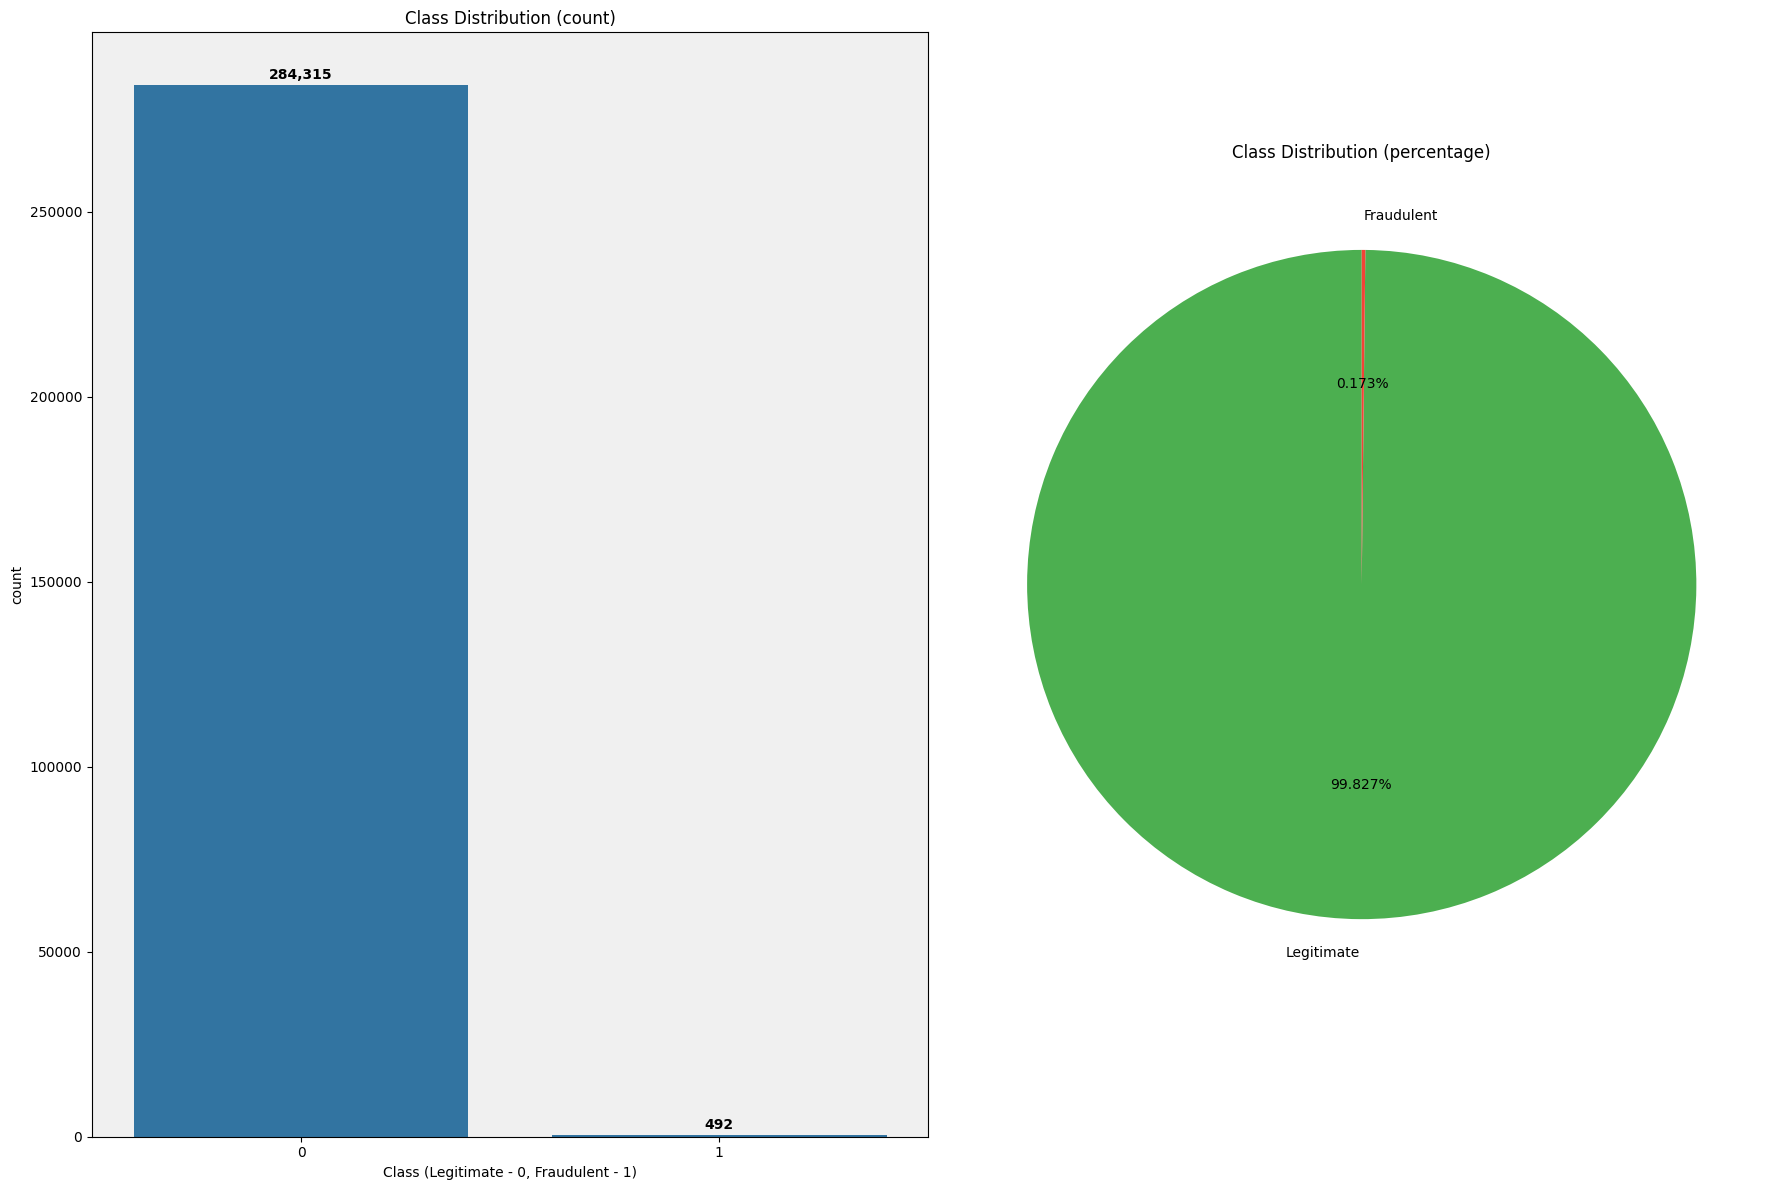

In [39]:
# Visualize class distribution
print("\n=== VISUALIZING CLASS DISTRIBUTION ===")
fig,axes = plt.subplots(1, 2, figsize=(18, 12))

# Count plot for class distribution
sns.countplot(x='Class', data=dataset, ax=axes[0])
axes[0].set_title('Class Distribution (count)')
axes[0].set_xlabel('Class (Legitimate - 0, Fraudulent - 1)')
for i, count in enumerate(class_counts):
    axes[0].text(i, count + 1500, f'{count:,}', ha='center', fontweight='bold')
axes[0].set_facecolor('#f0f0f0')

# Pie chart
colors = ['#4CAF50', '#F44336']  # Green for legitimate, Red for fraudulent transactions
axes[1].pie(class_counts, labels=['Legitimate', 'Fraudulent'],
            autopct='%.3f%%', startangle=90, colors=colors)
axes[1].set_title('Class Distribution (percentage)')

plt.tight_layout()
plt.show()

In [40]:
# Time series analysis
print("\n=== TIME SERIES ANALYSIS ===")

print(f"\nTime Range: {dataset['Time'].min()} to {dataset['Time'].max()} seconds")
print(f"Total Duration: {(dataset['Time'].max() - dataset['Time'].min())/3600:.2f} hours")

# Convert time to hours for readability
dataset['time_hrs'] = dataset['Time'] / 3600
dataset['time_hrs'] = dataset['time_hrs'].round(2)


=== TIME SERIES ANALYSIS ===

Time Range: 0.0 to 172792.0 seconds
Total Duration: 48.00 hours


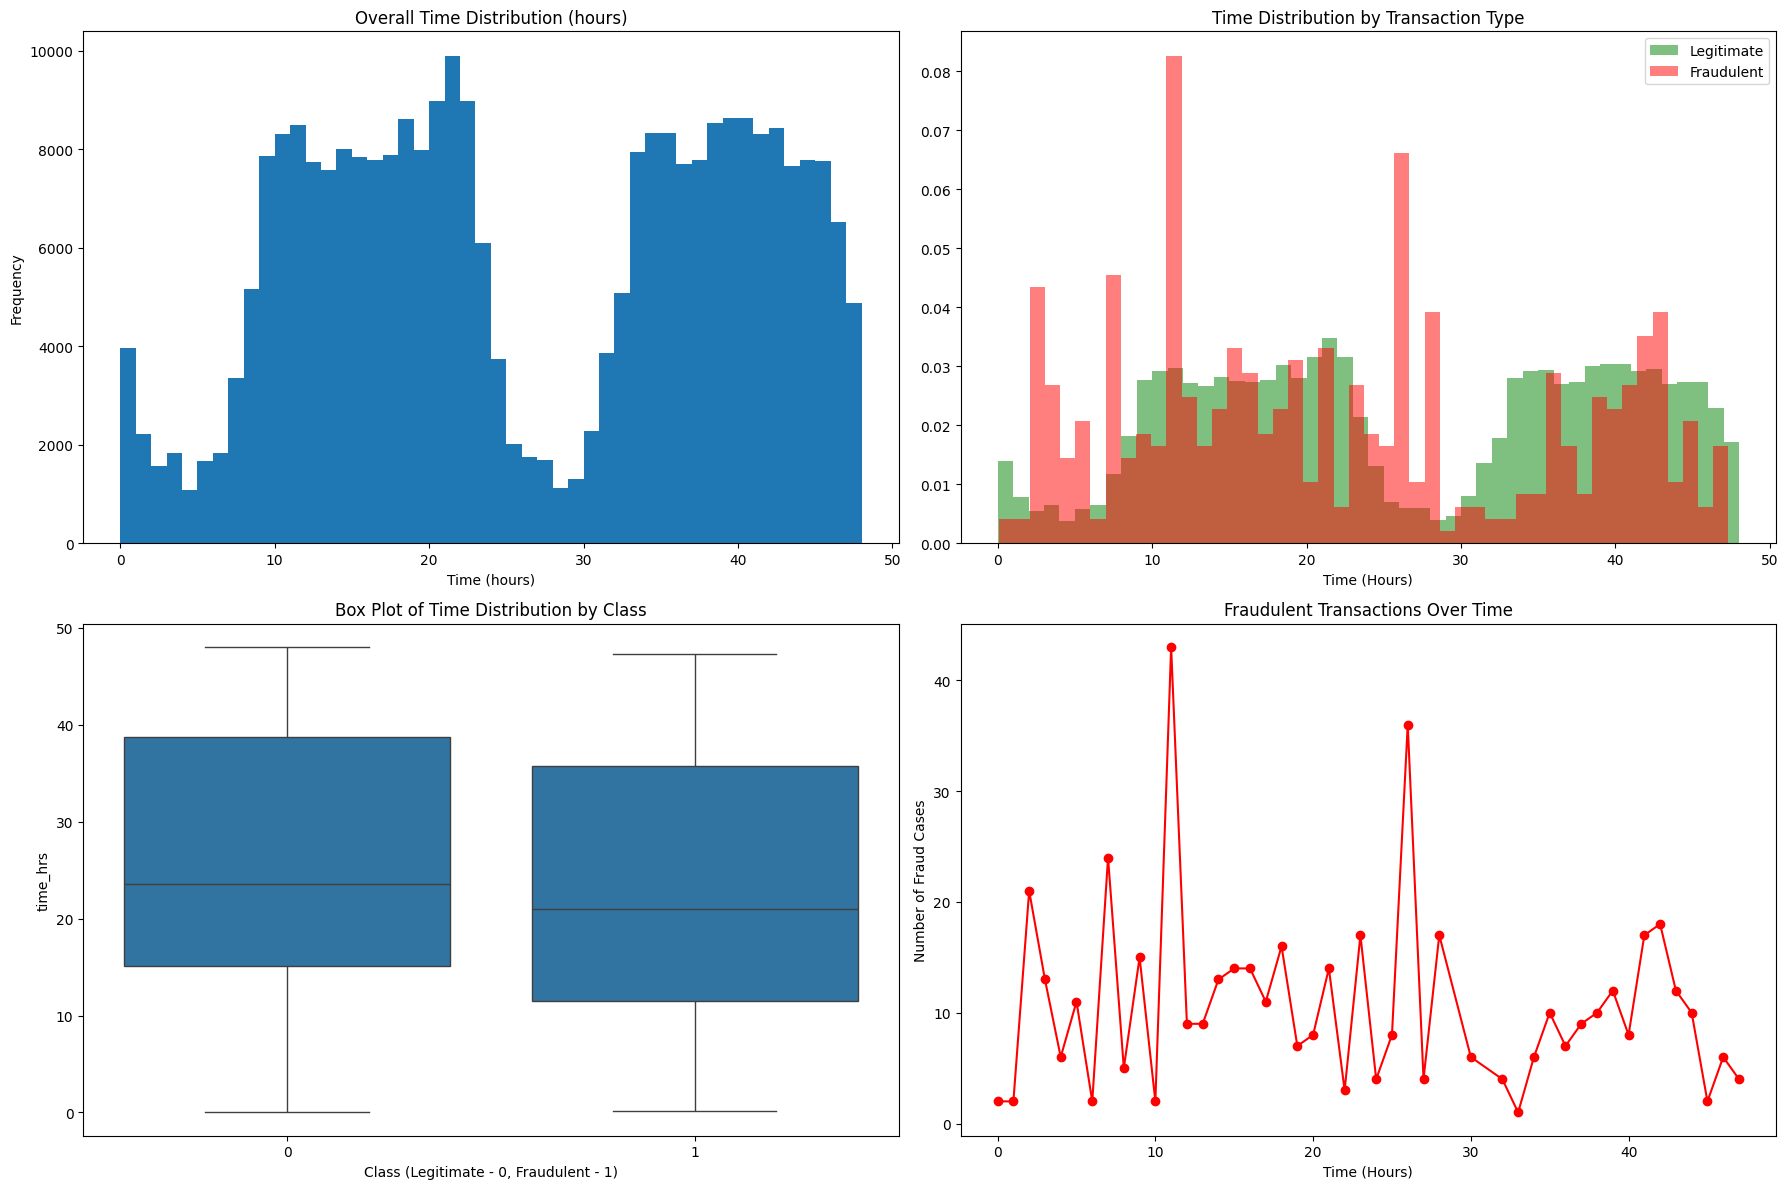

In [41]:
# Plot time series
fig,axes1 = plt.subplots(2, 2, figsize=(18, 12))

# Overall time distribution - histogram of transactions over the time period
axes1[0,0].hist(dataset['time_hrs'], bins=48)
axes1[0,0].set_title('Overall Time Distribution (hours)')
axes1[0,0].set_xlabel('Time (hours)')
axes1[0,0].set_ylabel('Frequency')

# Time Distribution by class
for class_val, color, label in [(0, 'green', 'Legitimate'), (1, 'red', 'Fraudulent')]:
    subset = dataset[dataset['Class'] == class_val]
    axes1[0,1].hist(subset['time_hrs'], bins=48, alpha=0.5, 
                   color=color, label=label, density=True)
axes1[0,1].set_title('Time Distribution by Transaction Type')
axes1[0,1].set_xlabel('Time (Hours)')
axes1[0,1].legend()

# Box plot for time distribution
sns.boxplot(x='Class', y='time_hrs', data=dataset, ax=axes1[1,0])
axes1[1,0].set_title('Box Plot of Time Distribution by Class')
axes1[1,0].set_xlabel('Class (Legitimate - 0, Fraudulent - 1)')

# Fraud by time visualization
fraud_by_time = dataset[dataset['Class']==1].groupby(dataset['time_hrs'].astype('int')).count()['Class']
# print(fraud_by_time)
fraud_by_time = fraud_by_time.reset_index()
fraud_by_time.columns = ['time_hrs', 'fraud_count']
axes1[1,1].plot(fraud_by_time['time_hrs'], fraud_by_time['fraud_count'],
                color='red', marker='o')
axes1[1,1].set_title('Fraudulent Transactions Over Time')
axes1[1,1].set_xlabel('Time (Hours)')
axes1[1,1].set_ylabel('Number of Fraud Cases')

plt.tight_layout()
plt.show()

In [42]:
# Variable amount analysis
print("\n=== VARIABLE AMOUNT ANALYSIS ===")
print("\nStatistics of Amount Column:")
amount_stats = dataset['Amount'].describe().round(2)
print(amount_stats)


=== VARIABLE AMOUNT ANALYSIS ===

Statistics of Amount Column:
count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64


In [43]:
# Variable amount analysis classwise
print("\n=== VARIABLE AMOUNT ANALYSIS BY CLASS ===")
class_amount_means = []
for class_val in dataset['Class'].unique():
    subset = dataset[dataset['Class'] == class_val]
    class_amount_means.append(subset['Amount'].mean())
    print(f"\nClass {class_val} - Amount Statistics:")
    print(subset['Amount'].describe().round(2))


=== VARIABLE AMOUNT ANALYSIS BY CLASS ===

Class 0 - Amount Statistics:
count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64

Class 1 - Amount Statistics:
count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


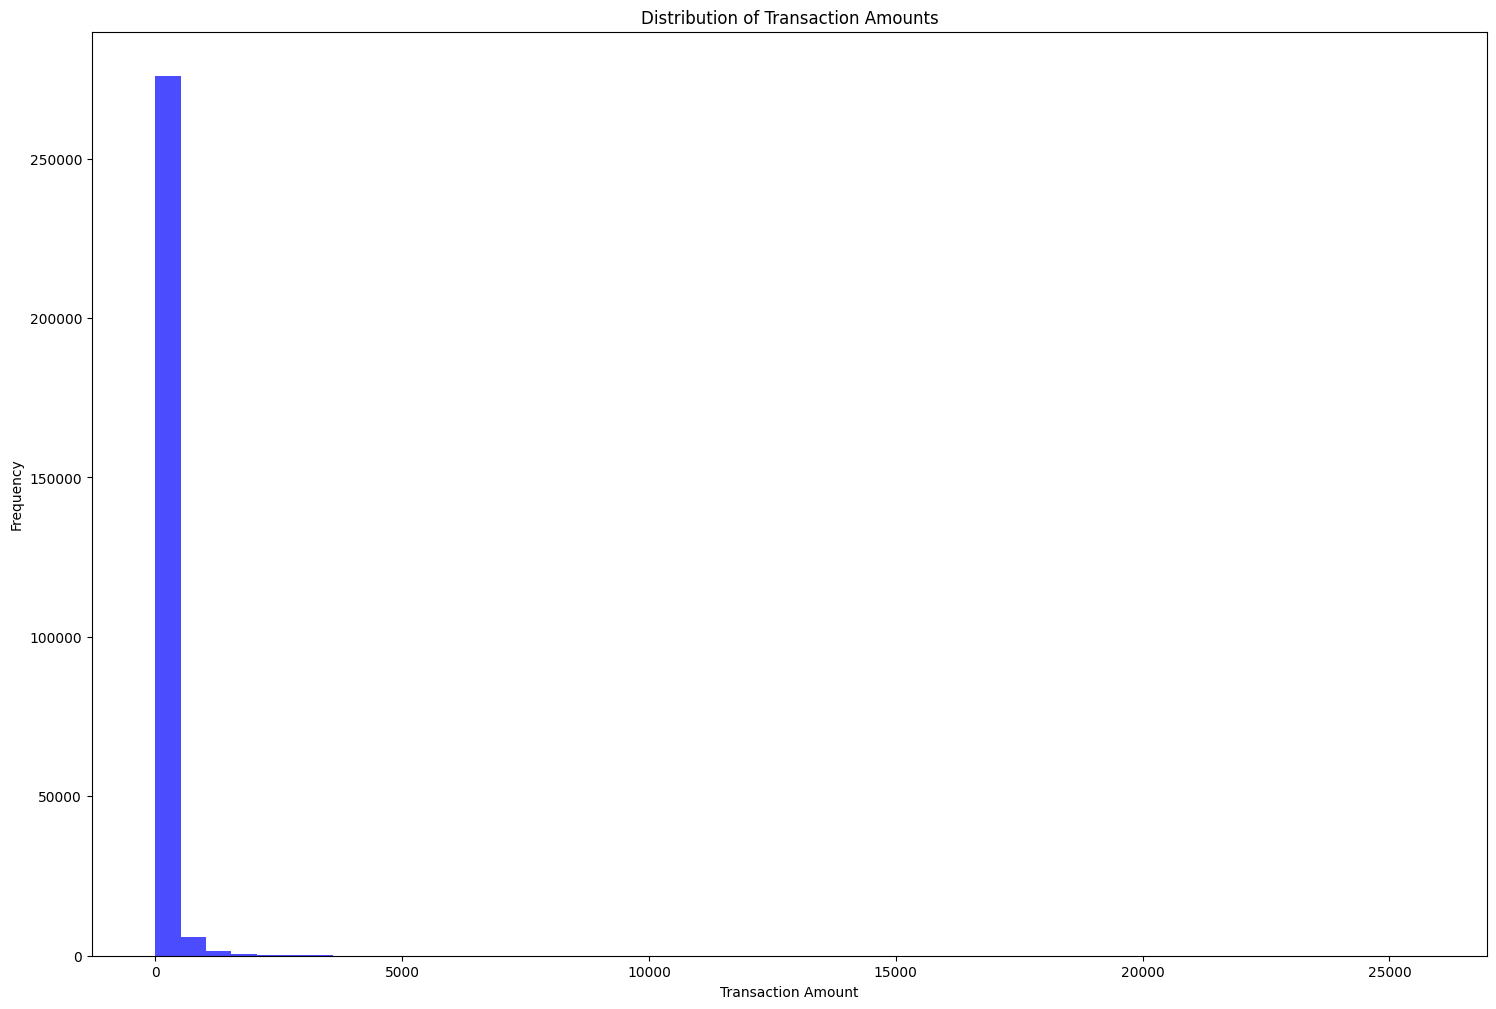

In [44]:
# Visualize variable "amount" distribution
plt.figure(figsize=(18, 12))
plt.hist(dataset['Amount'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

We see that the data is highly skewed, making it difficult to visualize and extract essential information. So we plot the hist plot by transforming data to log scale.

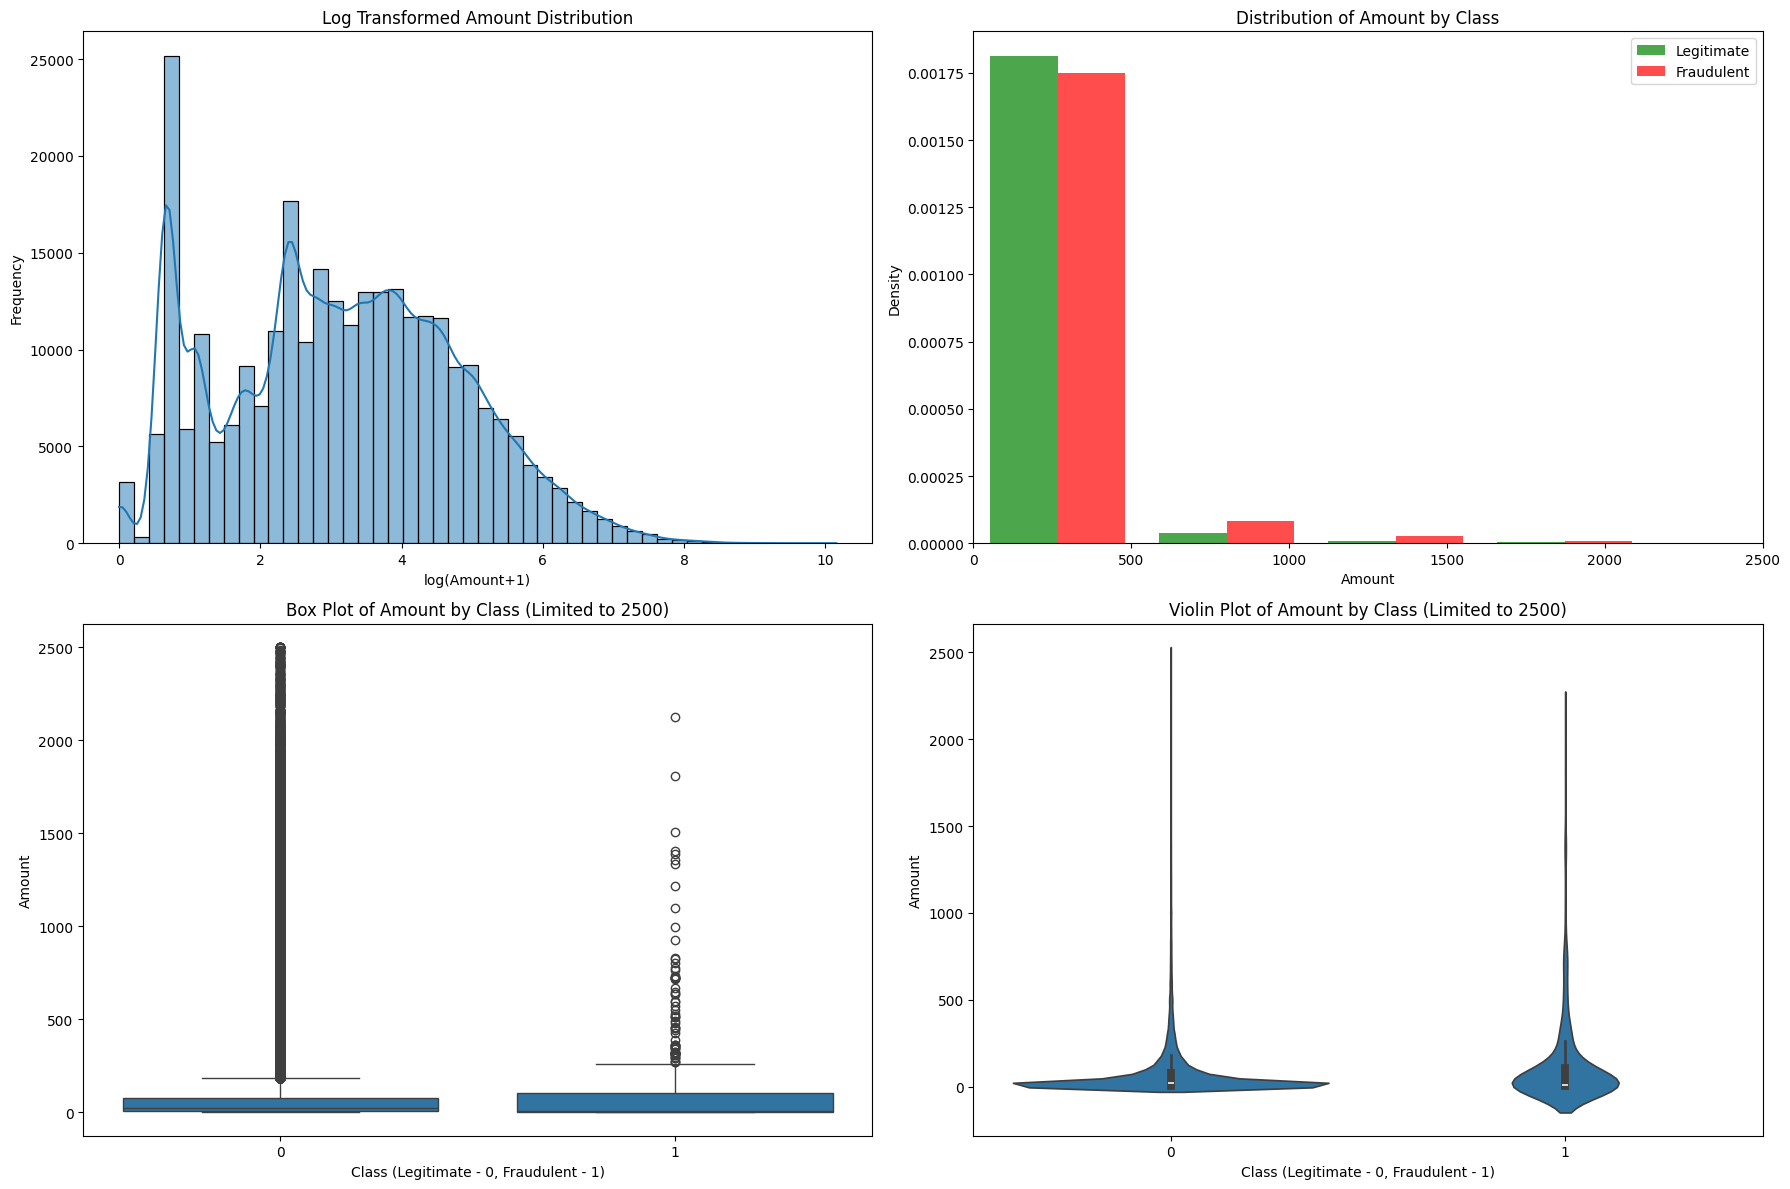

In [45]:
fig, axes2 = plt.subplots(2, 2, figsize=(18, 12))

# Histogram for amount distribution
sns.histplot(np.log1p(dataset['Amount']), bins=48, ax=axes2[0, 0], kde=True)
# axes2[0].hist(np.log1p(dataset['Amount']), bins=48)
axes2[0, 0].set_title('Log Transformed Amount Distribution')
axes2[0, 0].set_xlabel('log(Amount+1)')
axes2[0, 0].set_ylabel('Frequency')

# Distribution of Amount by Class
legitimate = dataset[dataset['Class'] == 0]['Amount']
fraudulent = dataset[dataset['Class'] == 1]['Amount']

axes2[0,1].hist([legitimate, fraudulent], bins=48,
               label=['Legitimate', 'Fraudulent'], color=['green', 'red'],
               alpha=0.7, density=True)
axes2[0,1].set_title('Distribution of Amount by Class')
axes2[0,1].set_xlabel('Amount')
axes2[0,1].set_ylabel('Density')
axes2[0,1].legend()
axes2[0,1].set_xlim(0, 2500)  # Limit x-axis for better visibility
# set limit to 2500 because most of the transactions are below this value
# and no fraudulent transactions are above this value

# Box plot for Amount by Class

# limiting the transcations considered to 2500
dataset_limited = dataset[dataset['Amount'] <= 2500].copy()
sns.boxplot(x='Class', y='Amount', data=dataset_limited, ax=axes2[1, 0])
axes2[1, 0].set_title('Box Plot of Amount by Class (Limited to 2500)')
axes2[1, 0].set_xlabel('Class (Legitimate - 0, Fraudulent - 1)')
axes2[1, 0].set_ylabel('Amount')

# violin plot for Amount by Class
sns.violinplot(x='Class', y='Amount', data=dataset_limited, ax=axes2[1, 1])
axes2[1, 1].set_title('Violin Plot of Amount by Class (Limited to 2500)')
axes2[1, 1].set_xlabel('Class (Legitimate - 0, Fraudulent - 1)')
axes2[1, 1].set_ylabel('Amount')

plt.tight_layout()
plt.show()

In [46]:
# PCA Fratures Analysis
print("\n=== PCA FEATURES ANALYSIS ===")

# Extract PCA Features
pca_features = [col for col in dataset.columns if col.startswith('V')]

# for pca in pca_features:
#     print(f"{pca}")

print(f"\nNumber of PCA Features: {len(pca_features)}")


=== PCA FEATURES ANALYSIS ===

Number of PCA Features: 28


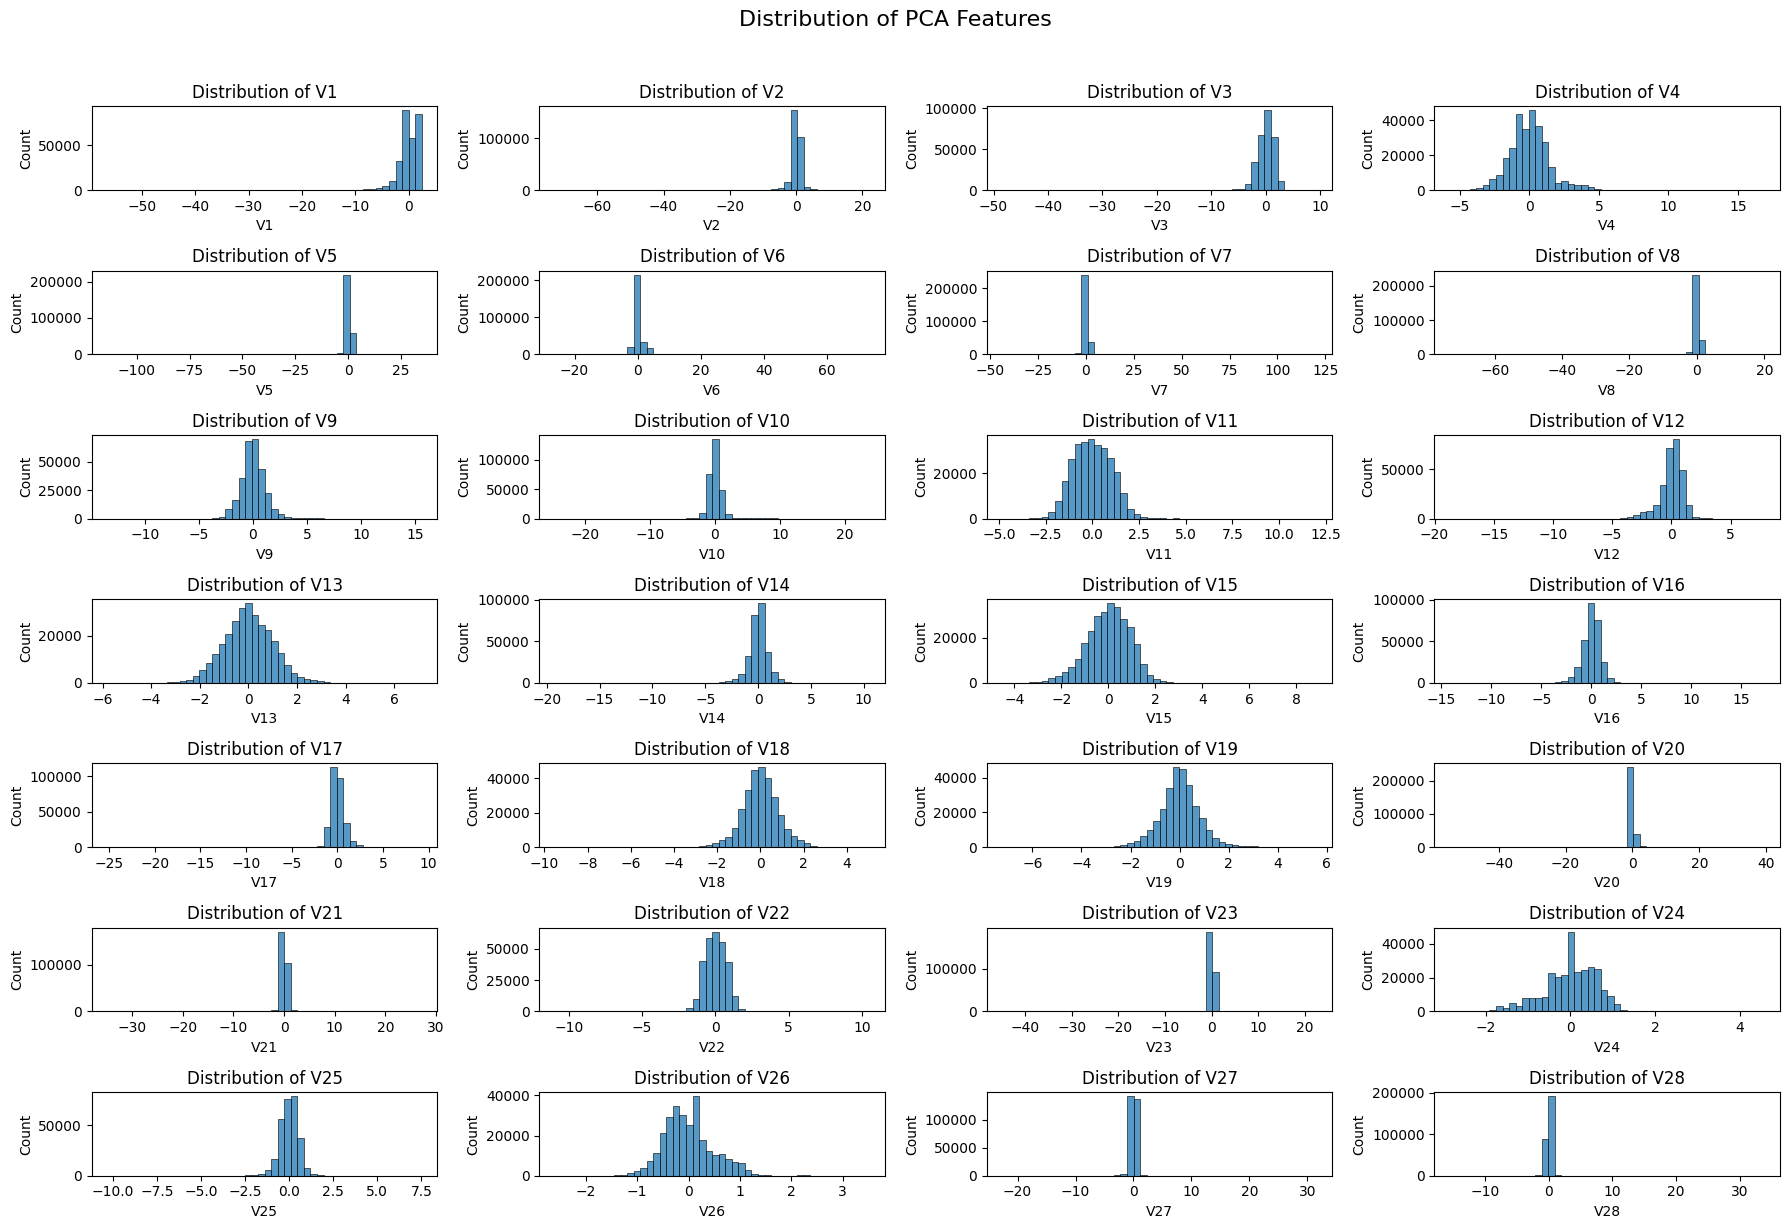

In [47]:
# distribution of PCA features
fig, axes3 = plt.subplots(7, 4, figsize=(18, 12))

for i, pca in enumerate(pca_features):
    sns.histplot(dataset[pca], bins=48, ax=axes3[i // 4, i % 4])
    axes3[i // 4, i % 4].set_title(f'Distribution of {pca}')

plt.suptitle('Distribution of PCA Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


=== CORRELATION ANALYSIS ===


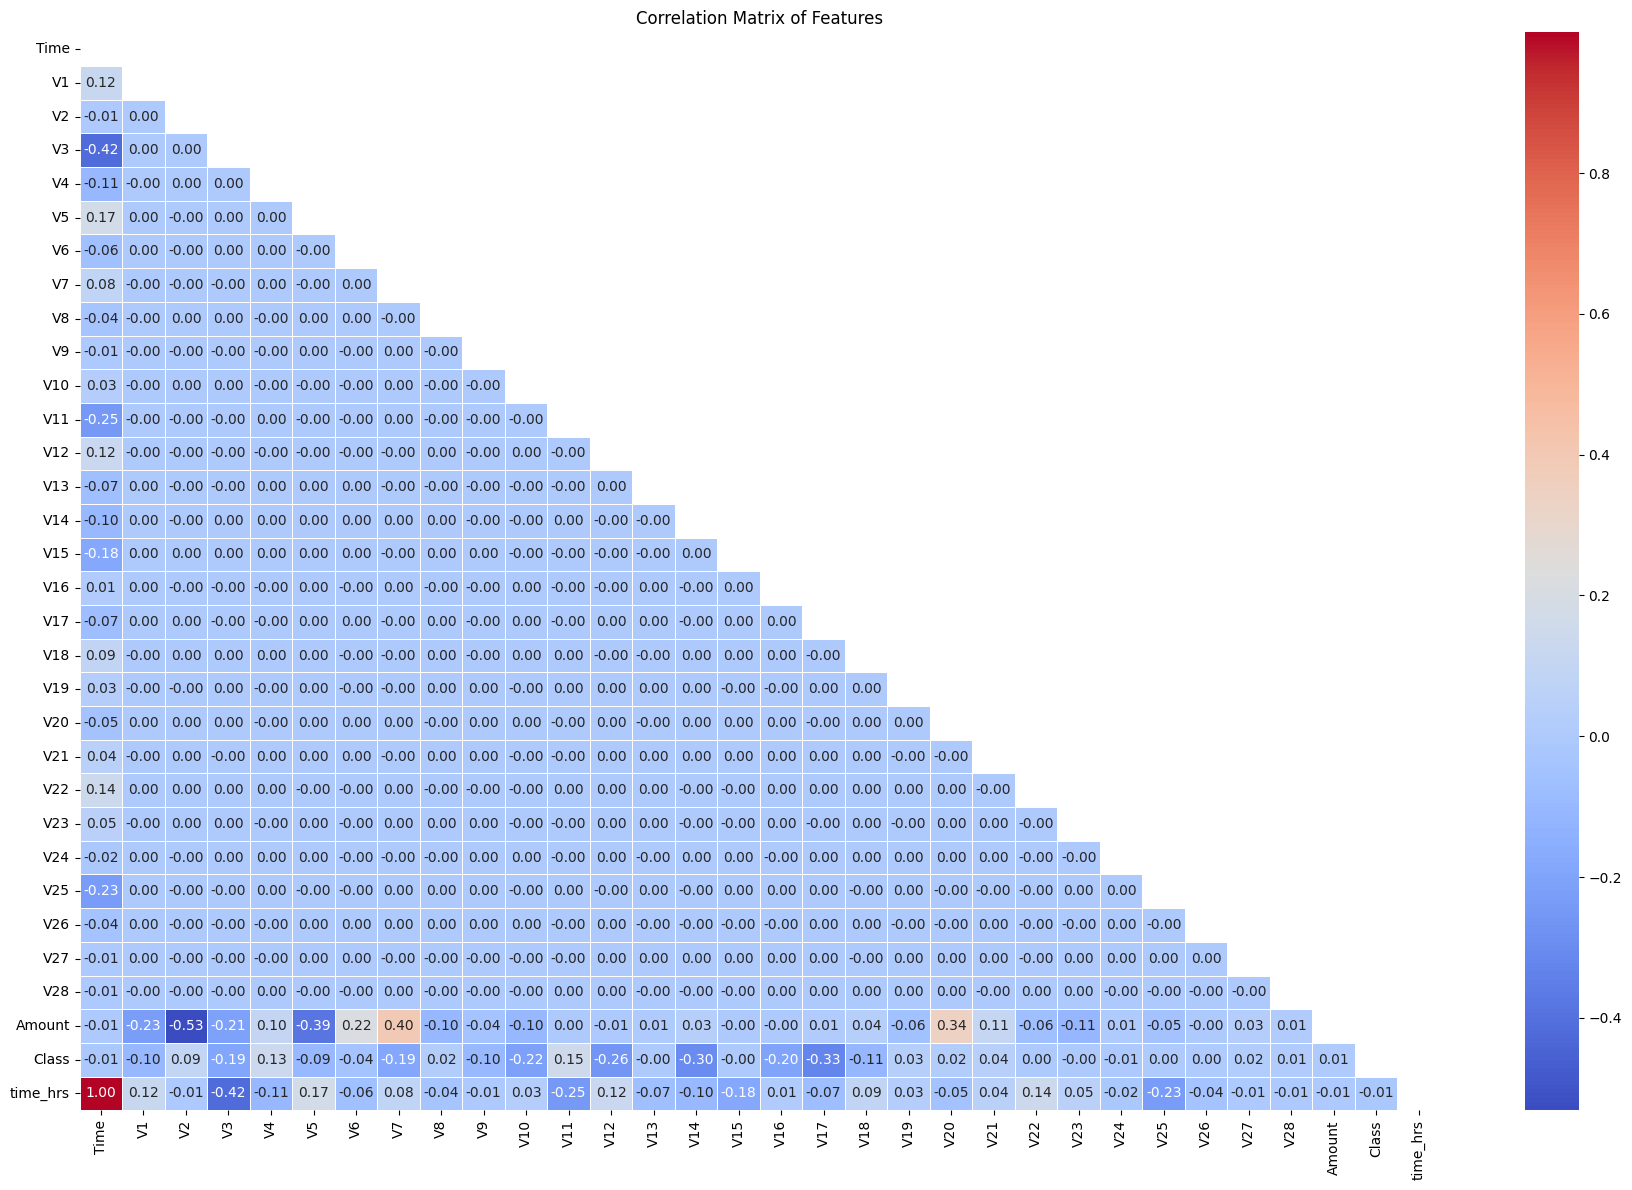

In [48]:
# Correlation analysis
print("\n=== CORRELATION ANALYSIS ===")

correlation_matrix = dataset.corr()

plt.figure(figsize=(18, 12))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Show only lower triangle

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [49]:
# Extract highly correlated PCA features
print("\n=== HIGHLY CORRELATED PCA FEATURES ===")
threshold = 0.5

pca_corr = dataset[pca_features].corr()

high_corr_pairs = []
for i in range(len(pca_features)):
    for j in range(i+1, len(pca_features)):
        corr_val = pca_corr.iloc[i, j]
        if abs(corr_val) > threshold:
            high_corr_pairs.append((pca_features[i], pca_features[j], corr_val))
# print(high_corr_pairs)
# print(pca_features[12], pca_features[13], pca_corr.iloc[12, 13])

if high_corr_pairs:
    print(f"\nFound {len(high_corr_pairs)} pairs of highly correlated PCA features (|correlation| > {threshold}):")
    for p1, p2, corr in high_corr_pairs:
        print(f"{p1} and {p2}: {corr:.2f}")
else:
    print(f"\nNo pairs of PCA features found with |correlation| > {threshold}.")


=== HIGHLY CORRELATED PCA FEATURES ===

No pairs of PCA features found with |correlation| > 0.5.


In [50]:
# Most discriminative features
print("\n=== MOST DISCRIMINATIVE FEATURES ===")

feature_importance = {}
all_features = ['Amount','Time'] + pca_features
for feature in all_features:

    # calculate mean of feature for each class
    legitimate_mean = dataset[dataset['Class'] == 0][feature].mean()
    fraudulent_mean = dataset[dataset['Class'] == 1][feature].mean()
    
    # calculate the difference between means and normalize it
    # by the standard deviation of the feature

    # this gives us a measure of how discriminative the feature is
    # larger the value, more discriminative the feature is
    
    diff = abs(legitimate_mean - fraudulent_mean)
    overall_std = dataset[feature].std()
    
    normalized_diff = diff / overall_std if overall_std != 0 else 0
    # append the feature and its normalized difference to the list
    feature_importance[feature] = normalized_diff

# display(feature_importance)

# Sort features by their discriminative power

# coerce into dataframe for better visualization
importance_df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Discriminative Power'])
# display(importance_df)

# sort based on discriminative power
importance_df = importance_df.sort_values(by='Discriminative Power', ascending=False)
importance_df.reset_index(drop=True, inplace=True)
importance_df['Discriminative Power'] = importance_df['Discriminative Power'].round(2)
# display(importance_df)

# Extract 15 most discriminative features
top_15_features = importance_df.head(15)
print("\n=== TOP 15 MOST DISCRIMINATIVE FEATURES ===")
display(top_15_features)


=== MOST DISCRIMINATIVE FEATURES ===

=== TOP 15 MOST DISCRIMINATIVE FEATURES ===


,Feature,Discriminative Power
0,V17,7.86
1,V14,7.29
2,V12,6.28
3,V10,5.22
4,V16,4.73
5,V3,4.65
6,V7,4.51
7,V11,3.73
8,V4,3.21
9,V18,2.68



=== VISUALIZING MOST DISCRIMINATIVE FEATURES ===


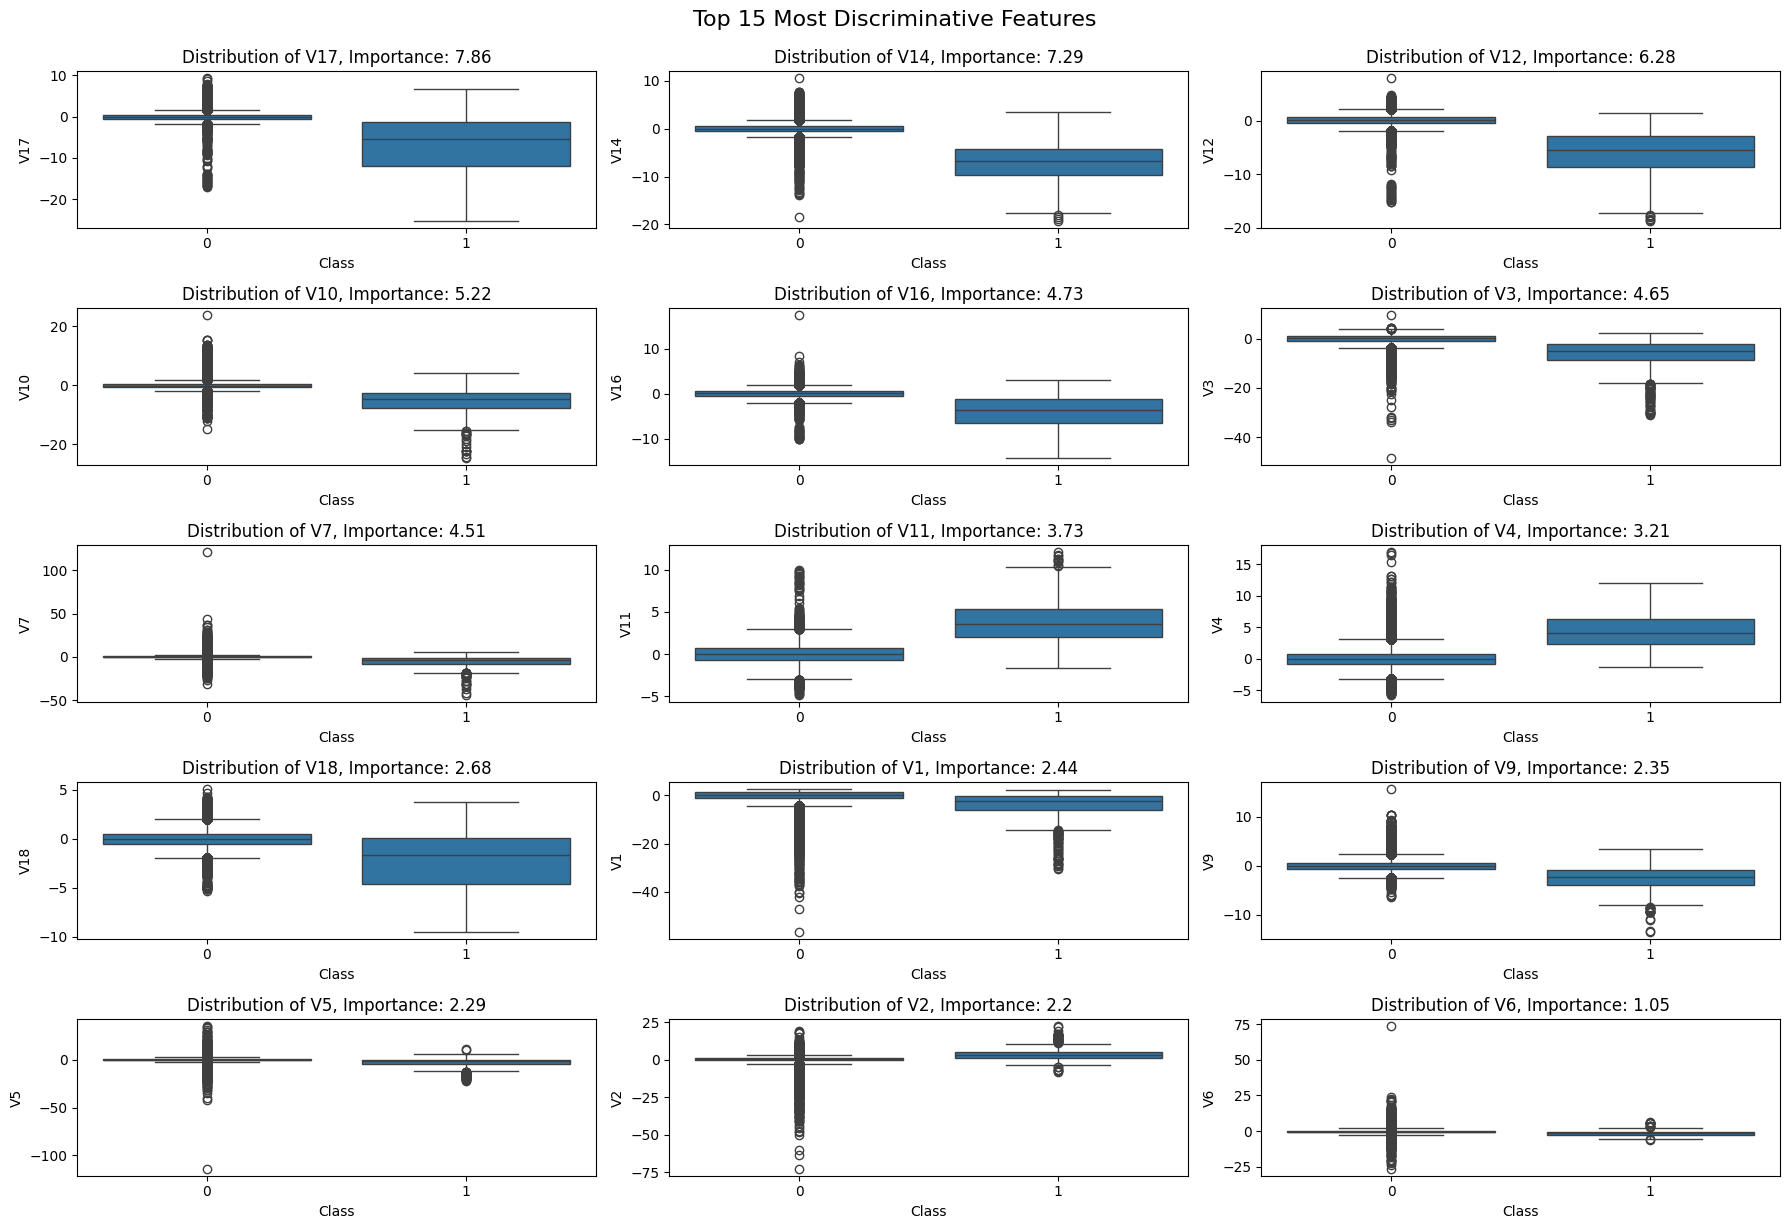

In [51]:
# Visualize the most discriminative features
print("\n=== VISUALIZING MOST DISCRIMINATIVE FEATURES ===")
fig, axes4 = plt.subplots(5, 3, figsize=(18, 12))
for i, feat in enumerate(top_15_features['Feature']):
    sns.boxplot(x='Class', y=feat, data=dataset, ax=axes4[i // 3, i % 3])
    axes4[i // 3, i % 3].set_title(f'Distribution of {feat}, Importance: {top_15_features.iloc[i]["Discriminative Power"]}')
    # axes4[i // 2, i % 2].set_xlabel(feat)
# axes4[i // 2, i % 2].set_ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Top 15 Most Discriminative Features', y=1.02, fontsize=16)
plt.show()

In [52]:
# Statistical significance test
print("\n=== STATISTICAL SIGNIFICANCE TEST ===")
print("\nPerforming Mann-Whitney U test for each feature...")
alpha = 0.001  # significance level
# display(dataset.head(5))

sign_test_results = []
for feature in all_features:
    legitimate_values = dataset[dataset['Class'] == 0][feature]
    fraudulent_values = dataset[dataset['Class'] == 1][feature]
    
    # Perform Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(legitimate_values, fraudulent_values, alternative='two-sided')

    # Append results to list
    sign_test_results.append({'Feature': feature, 'U-statistic': stat, 'p-value': p_value})

# Convert results to DataFrame
sign_test_results = pd.DataFrame(sign_test_results)

# display(sign_test_results)
# sort the results by p-value
sign_test_results = sign_test_results.sort_values(by='p-value')
sign_test_results.reset_index(drop=True, inplace=True)
sign_test_results['p-value'] = sign_test_results['p-value'].round(4)
sign_test_results['Significant'] = sign_test_results['p-value'] < alpha  # significance level of 0.001

# display(sign_test_results)

significant_features = sign_test_results[sign_test_results['Significant']]['Feature'].tolist()
if significant_features:
    print(f"\nFound {len(significant_features)} features with p-value < {alpha}:")
    display(significant_features)
else:
    print(f"\nNo features found with p-value < {alpha}.")


=== STATISTICAL SIGNIFICANCE TEST ===

Performing Mann-Whitney U test for each feature...

Found 24 features with p-value < 0.001:


['V14',
 'V4',
 'V12',
 'V11',
 'V10',
 'V3',
 'V2',
 'V16',
 'V9',
 'V7',
 'V17',
 'V1',
 'V6',
 'V21',
 'V18',
 'V5',
 'V27',
 'V8',
 'V19',
 'V20',
 'V28',
 'Time',
 'V24',
 'Amount']

In [53]:
# Outlier detection
# Using IQR method

print("\n=== OUTLIER DETECTION ===")
print("\nUsing IQR method...")

def iqr_to_detect_outliers(data, feature):

    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# outliers, lower_bound, upper_bound = iqr_to_detect_outliers(dataset,'Amount')
# print(outliers['Amount'])

outlier_summary = []
key_features = ['Amount'] + top_15_features['Feature'].tolist()
for feature in key_features:
    outliers, lower_bound, upper_bound = iqr_to_detect_outliers(dataset, feature)
    if not outliers.empty:
        outlier_summary.append({
            'Feature': feature,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Number of Outliers': len(outliers),
            'Outlier Percentage': (len(outliers) / len(dataset)) * 100
        })
    else:
        print(f"\nNo outliers detected in feature '{feature}'.")
outlier_summary = pd.DataFrame(outlier_summary)
outlier_summary = outlier_summary.round(2)
print("\n=== OUTLIER SUMMARY ===")
display(outlier_summary)


=== OUTLIER DETECTION ===

Using IQR method...

=== OUTLIER SUMMARY ===


,Feature,Lower Bound,Upper Bound,Number of Outliers,Outlier Percentage
0,Amount,-101.75,184.51,31904,11.20
1,V17,-1.80,1.72,7421,2.61
2,V14,-1.81,1.87,14206,4.99
3,V12,-1.95,2.16,15146,5.32
4,V10,-2.02,1.93,9471,3.33
5,V16,-1.95,2.00,8214,2.88
6,V3,-3.77,3.91,3350,1.18
7,V7,-2.23,2.25,8969,3.15
8,V11,-3.01,2.99,775,0.27
9,V4,-3.24,3.12,11188,3.93



=== VISUALIZING OUTLIERS FOR KEY FEATURES ===


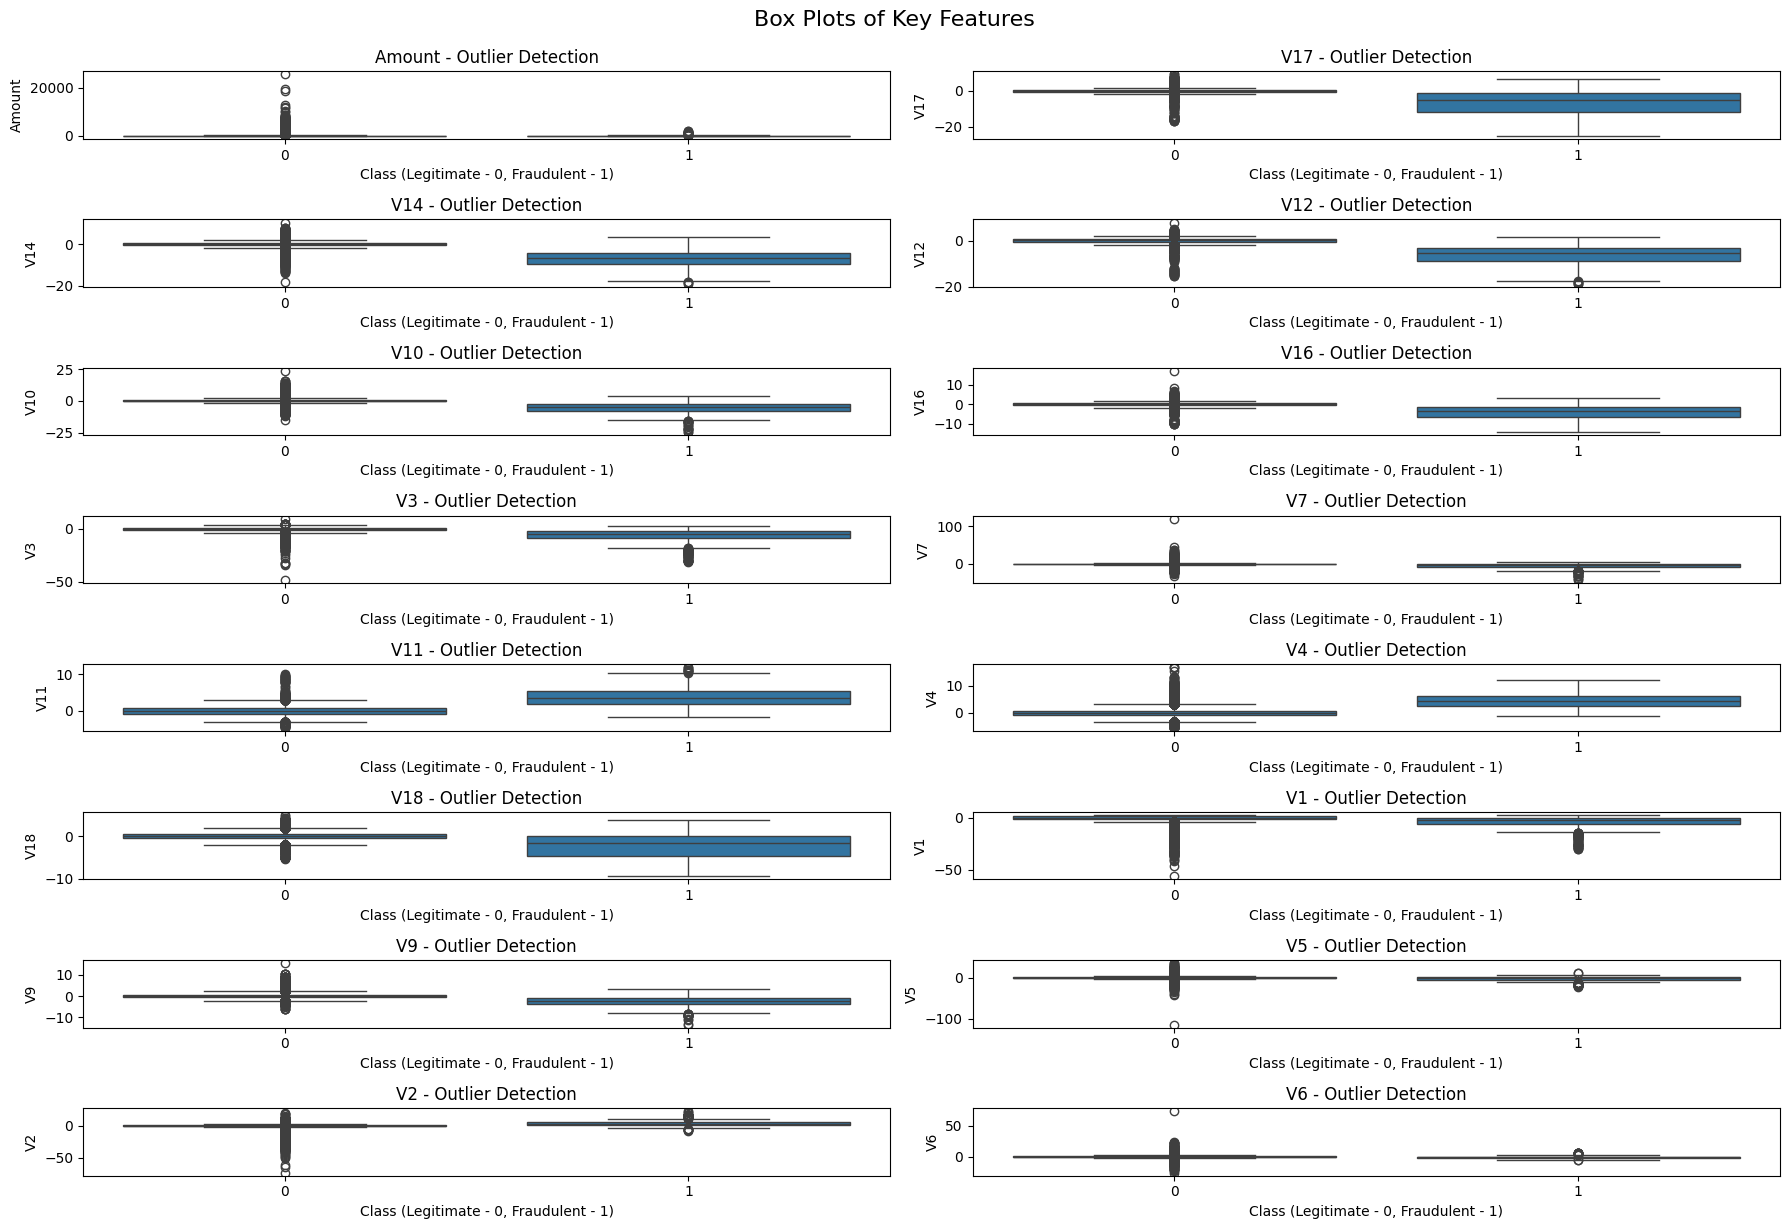

In [55]:
# Visualize outliers for key features
print("\n=== VISUALIZING OUTLIERS FOR KEY FEATURES ===")
fig, axes5 = plt.subplots(8, 2, figsize=(18, 12))
for i, feature in enumerate(key_features):
    sns.boxplot(x='Class', y=feature, data=dataset, ax=axes5[i // 2, i % 2])
    axes5[i // 2, i % 2].set_title(f'{feature} - Outlier Detection')
    axes5[i // 2, i % 2].set_xlabel('Class (Legitimate - 0, Fraudulent - 1)')
    axes5[i // 2, i % 2].set_ylabel(feature)
plt.tight_layout()
plt.suptitle('Box Plots of Key Features', y=1.02, fontsize=16)
plt.show()

In [56]:
# Data Quality Summary
print("\n=== DATA QUALITY SUMMARY ===")
print("="*100)

# Dataset Overview
print("\n=== DATASET OVERVIEW ===")
print(f"--Total Transactions: {len(dataset):,}")
print(f"--Total Features: {dataset.shape[1]} ({len(pca_features)} PCA + Amount + Class + Time)")
print(f"--Time Period: {int(dataset['Time'].min()/3600)} to {int(dataset['Time'].max()/3600)+1} hours")
print(f"--Dataset shape: {dataset.shape}")
print(f"--Memory Usage: {memory_usage} MB")

print("\n=== CLASS DISTRIBUTION ===")
print(f"--Legitimate Transactions: {class_counts_percentage[0]:.3f}% ({class_counts[0]:,})")
print(f"--Fraudulent Transactions: {class_counts_percentage[1]:.3f}% ({class_counts[1]:,})")
print(f"--Class Imbalance Ratio: {imbalance_ratio:.2f} (Legitimate: {legitimate_count:,}, Fraudulent: {fraudulent_count:,})")
print(f"--Severely Imbalanced: {imbalance_ratio > 100}")

print("\n=== DATA QUALITY METRICS ===")
print(f"--Missing Values: {missing_val_cols.sum() if not missing_val_cols.empty else 0}")
print(f"--Duplicate Rows: {duplicates:.2f}%")

print("\n=== FEATURE INSIGHTS ===")
print(f"--Total PCA Features: {len(pca_features)}")
print(f"--Most Discriminative Features: {', '.join(top_15_features['Feature'].tolist())}")
print(f"--Significant Features (p-value < {alpha}): {', '.join(significant_features) if significant_features else 'None'}\n")

print("="*100)
print("EDA COMPLETED SUCCESSFULLY!")


=== DATA QUALITY SUMMARY ===

=== DATASET OVERVIEW ===
--Total Transactions: 284,807
--Total Features: 32 (28 PCA + Amount + Class + Time)
--Time Period: 0 to 48 hours
--Dataset shape: (284807, 32)
--Memory Usage: 67.36 MB

=== CLASS DISTRIBUTION ===
--Legitimate Transactions: 99.830% (284,315)
--Fraudulent Transactions: 0.170% (492)
--Class Imbalance Ratio: 577.88 (Legitimate: 284,315, Fraudulent: 492)
--Severely Imbalanced: True

=== DATA QUALITY METRICS ===
--Missing Values: 0
--Duplicate Rows: 0.38%

=== FEATURE INSIGHTS ===
--Total PCA Features: 28
--Most Discriminative Features: V17, V14, V12, V10, V16, V3, V7, V11, V4, V18, V1, V9, V5, V2, V6
--Significant Features (p-value < 0.001): V14, V4, V12, V11, V10, V3, V2, V16, V9, V7, V17, V1, V6, V21, V18, V5, V27, V8, V19, V20, V28, Time, V24, Amount

EDA COMPLETED SUCCESSFULLY!


In [57]:
# Export key insights

insights = {
    "memory_usage_mb": memory_usage,
    "dataset_shape": dataset.shape,
    "imbalance_ratio": imbalance_ratio,
    "fraud_rate": class_counts_percentage[1],
    "missing_values": missing_val_cols.to_dict() if not missing_val_cols.empty else {},
    "duplicates_percentage": duplicates,
    "top_15_features": top_15_features['Feature'].tolist(),
    "significant_features": significant_features,
    'amount_stats': {
        'legitimate_mean': class_amount_means[0],
        'fraudulent_mean': class_amount_means[1],
        'max_transaction_amount': dataset['Amount'].max(),
        'min_transaction_amount': dataset['Amount'].min(),
        'amount_std': dataset['Amount'].std()
    }
}

with open('../data/eda_insights.json', 'w') as f:
    json.dump(insights, f, indent=2)
print("\nKey insights exported to 'eda_insights.json' successfully!\n")
print("="*100)
print("\n=== END OF EDA SCRIPT ===")


Key insights exported to 'eda_insights.json' successfully!


=== END OF EDA SCRIPT ===
